# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
# YOUR CODE HERE!
my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [5]:
# Fetch current BTC price
# YOUR CODE HERE!
response=requests.get(btc_url)
data=response.json()
btc_price=data['data']['1']['quotes']['USD']['price']
# Fetch current ETH price
eth_price=data['data']['1']['quotes']['USD']['price']
response=requests.get(eth_url)
data=response.json()
# Compute current value of my crpto
# YOUR CODE HERE!
my_btc_value=my_btc*btc_price
my_eth_value=my_eth*eth_price
# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $34920.00
The current value of your 5.3 ETH is $154230.00


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [6]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [7]:
# Set Alpaca API key and secret
# YOUR CODE HERE!
alpaca_api_key=os.getenv('ALPACA_API_KEY')
alpaca_secret_key=os.getenv('ALPACA_SECRET_KEY')
# Create the Alpaca API object
# YOUR CODE HERE!
api=tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version='v2'
)

In [8]:
# Format current date as ISO format
# YOUR CODE HERE!
start_date=pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()
end_date=pd.Timestamp('2021-05-03', tz='America/New_York').isoformat()
# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
# YOUR CODE HERE!
df_ticker=api.get_bars(tickers,timeframe,start=start_date,end=end_date).df
# Reorganize the DataFrame
# Separate ticker data
# YOUR CODE HERE!
AGG=df_ticker[df_ticker['symbol']=='AGG'].drop('symbol',axis=1)
SPY=df_ticker[df_ticker['symbol']=='SPY'].drop('symbol',axis=1)

# Concatenate the ticker DataFrames
# YOUR CODE HERE!
df_ticker=pd.concat([AGG,SPY],axis=1,keys=['AGG','SPY'])
# Preview DataFrame
# YOUR CODE HERE!
df_ticker.head()

AGG                                               \
                            open    high     low   close   volume trade_count   
timestamp                                                                       
2021-05-03 04:00:00+00:00  114.4  114.59  114.33  114.39  5936657       23470   

                                          SPY                          \
                                 vwap    open    high      low  close   
timestamp                                                               
2021-05-03 04:00:00+00:00  114.434938  419.43  419.84  417.665  418.2   

                                                            
                             volume trade_count       vwap  
timestamp                                                   
2021-05-03 04:00:00+00:00  67670957      380266  418.28783

In [9]:
# Pick AGG and SPY close prices
# YOUR CODE HERE!
agg_close_price = AGG["close"].iloc[-1]
spy_close_price = SPY["close"].iloc[-1]
# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $114.39
Current SPY closing price: $418.2


In [10]:
# Compute the current value of shares
# YOUR CODE HERE!
my_spy_value=my_spy*spy_close_price
my_agg_value=my_agg*agg_close_price
# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $20910.00
The current value of your 200 AGG shares is $22878.00


### Savings Health Analysis

In [11]:
# Set monthly household income
# YOUR CODE HERE!
monthly_income=12000
# Consolidate financial assets data
# YOUR CODE HERE!
crypto_value=my_btc_value+my_eth_value
shares_value=my_spy_value+my_agg_value
# Create savings DataFrame
# YOUR CODE HERE!
df_savings=pd.DataFrame(
    {'amount':[crypto_value,shares_value]},index=['crypto','shares'])
# Display savings DataFrame
display(df_savings)

,amount
crypto,189150.0
shares,43788.0


<AxesSubplot:ylabel='amount'>

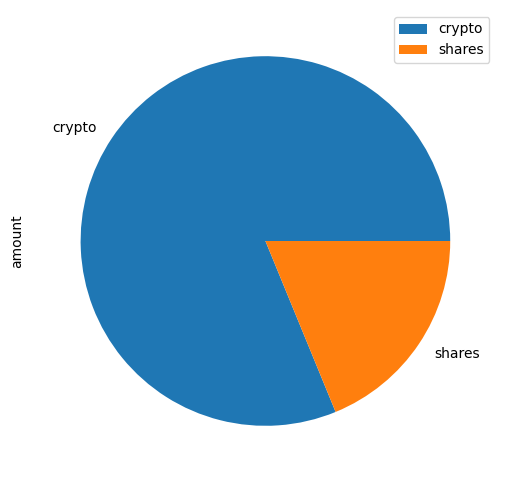

In [12]:
# Plot savings pie chart
# YOUR CODE HERE!
df_savings.plot.pie(y='amount',figsize=(6,6))

In [13]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
# YOUR CODE HERE!
total_savings=crypto_value+shares_value


# Validate saving health
# YOUR CODE HERE!
if total_savings>emergency_fund:
    print('Congrats you saved money')
elif total_savings>emergency_fund:
    print('you reached your goal')
else:
    short=total_savings-emergency_fund
    print(f'Your short{short}')

Congrats you saved money


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [14]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [15]:
# Get 5 years' worth of historical data for SPY and AGG
# YOUR CODE HERE!
df_stock_data = api.get_bars(
    tickers,
    timeframe,
    start=start_date,
    end=end_date).df
# Reorganize the DataFrame
# Separate ticker data
# YOUR CODE HERE!
AGG=df_stock_data[df_stock_data['symbol']=='AGG'].drop('symbol', axis=1)
SPY=df_stock_data[df_stock_data['symbol']=='SPY'].drop('symbol', axis=1)


# Concatenate the ticker DataFrames
# YOUR CODE HERE!
df_stock_data=pd.concat([AGG,SPY],axis=1,keys=['AGG','SPY'])
# Display sample data

new_df_stock_data=df_stock_data.copy()

new_df_stock_data.head()

AGG                                        \
                             open      high       low    close   volume   
timestamp                                                                 
2016-05-02 04:00:00+00:00  110.74  110.7400  110.5200  110.605  3553939   
2016-05-03 04:00:00+00:00  110.89  110.9450  110.7500  110.810  3044940   
2016-05-04 04:00:00+00:00  110.91  110.9315  110.7595  110.860  2920608   
2016-05-05 04:00:00+00:00  110.92  111.1600  110.8010  111.140  3008142   
2016-05-06 04:00:00+00:00  111.12  111.1200  110.9700  110.970  2718710   

                                                      SPY                  \
                          trade_count        vwap    open    high     low   
timestamp                                                                   
2016-05-02 04:00:00+00:00       15119  110.627199  206.92  208.18  206.41   
2016-05-03 04:00:00+00:00       15662  110.865995  206.52  206.80  205.28   
2016-05-04 04:00:00+00:00       13982  110.879063  204.99  205.85  204.42   
2016-05-05 04:00:00+00:00       15707  111.028363  205.56  205.98  204.47   
2016-05-06 04:00:00+00:00       12697  111.031967  204.08  205.77  203.88   

                                                                        
                              close     volume trade_count        vwap  
timestamp                                                               
2016-05-02 04:00:00+00:00  207.9700   61908515      263580  207.294812  
2016-05-03 04:00:00+00:00  206.1592  106422142      377518  206.312060  
2016-05-04 04:00:00+00:00  205.0100   92199810      345261  205.090172  
2016-05-05 04:00:00+00:00  204.9700   67597222      280622  205.141555  
2016-05-06 04:00:00+00:00  205.7200   89131004      340335  204.937074

In [16]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
MC_thirty=MCSimulation(
    portfolio_data=new_df_stock_data,
    weights=[.4,.6],
    num_simulation=500,
    num_trading_days=252 * 30)

In [17]:
# Printing the simulation input data
# YOUR CODE HERE!
MC_thirty.portfolio_data.head()

AGG                                        \
                             open      high       low    close   volume   
timestamp                                                                 
2016-05-02 04:00:00+00:00  110.74  110.7400  110.5200  110.605  3553939   
2016-05-03 04:00:00+00:00  110.89  110.9450  110.7500  110.810  3044940   
2016-05-04 04:00:00+00:00  110.91  110.9315  110.7595  110.860  2920608   
2016-05-05 04:00:00+00:00  110.92  111.1600  110.8010  111.140  3008142   
2016-05-06 04:00:00+00:00  111.12  111.1200  110.9700  110.970  2718710   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2016-05-02 04:00:00+00:00       15119  110.627199          NaN  206.92   
2016-05-03 04:00:00+00:00       15662  110.865995     0.001853  206.52   
2016-05-04 04:00:00+00:00       13982  110.879063     0.000451  204.99   
2016-05-05 04:00:00+00:00       15707  111.028363     0.002526  205.56   
2016-05-06 04:00:00+00:00       12697  111.031967    -0.001530  204.08   

                                                                            \
                             high     low     close     volume trade_count   
timestamp                                                                    
2016-05-02 04:00:00+00:00  208.18  206.41  207.9700   61908515      263580   
2016-05-03 04:00:00+00:00  206.80  205.28  206.1592  106422142      377518   
2016-05-04 04:00:00+00:00  205.85  204.42  205.0100   92199810      345261   
2016-05-05 04:00:00+00:00  205.98  204.47  204.9700   67597222      280622   
2016-05-06 04:00:00+00:00  205.77  203.88  205.7200   89131004      340335   

                                                    
                                 vwap daily_return  
timestamp                                           
2016-05-02 04:00:00+00:00  207.294812          NaN  
2016-05-03 04:00:00+00:00  206.312060    -0.008707  
2016-05-04 04:00:00+00:00  205.090172    -0.005574  
2016-05-05 04:00:00+00:00  205.141555    -0.000195  
2016-05-06 04:00:00+00:00  204.937074     0.003659

In [18]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
MC_thirty.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\16238\OneDrive\Desktop\Work Space\ASUBootCamp\05-APIs\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.996967,1.004174,1.004068,0.997223,1.006552,0.996772,0.990107,1.009432,0.999365,1.003555,...,1.002731,1.006913,0.998764,0.999365,0.998633,1.000572,1.006094,1.003454,1.007012,0.999071
2,1.002741,1.006101,1.012733,1.003092,1.008426,0.986188,0.998204,1.012007,0.989790,1.009167,...,0.986742,1.008130,1.001960,1.001372,0.993585,0.998258,1.010582,1.002946,1.000771,0.992788
3,0.998824,1.015149,1.016375,1.011307,1.021490,0.987114,0.999591,1.006636,0.982954,1.015722,...,0.993814,1.009301,0.997823,0.991355,0.992724,0.995368,1.017814,0.992858,1.007837,0.993627
4,1.006839,1.008356,1.024412,1.008318,1.022711,0.991631,0.997059,1.013157,0.991146,1.008271,...,0.988011,1.010039,0.999313,0.996502,0.992573,0.993670,1.025644,0.994787,0.997315,0.992401
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,16.765731,11.641064,14.495291,14.936019,4.513857,24.186443,6.875849,14.666070,10.538091,12.725294,...,5.869236,8.731840,13.882390,24.394588,13.375600,30.530279,6.235515,9.692443,15.018499,10.983652
7557,16.821061,11.709826,14.555336,14.936583,4.498109,24.373988,6.870260,14.685242,10.414392,12.870625,...,5.904151,8.681995,13.969442,24.253698,13.503051,30.921895,6.291983,9.810225,14.998980,10.986633
7558,16.727541,11.836632,14.553327,14.886989,4.463084,24.199395,6.835882,14.631572,10.433957,12.899279,...,5.906006,8.671696,14.074892,23.799735,13.499473,30.585471,6.304108,9.720739,14.924053,11.036574
7559,16.908311,11.748243,14.602518,14.811350,4.441588,24.212117,6.847345,14.752846,10.420931,12.771445,...,5.906460,8.682824,14.083327,23.832498,13.811038,30.626187,6.319527,9.697057,14.955941,10.953702


In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!
sim_outcome=MC_thirty.plot_simulation()

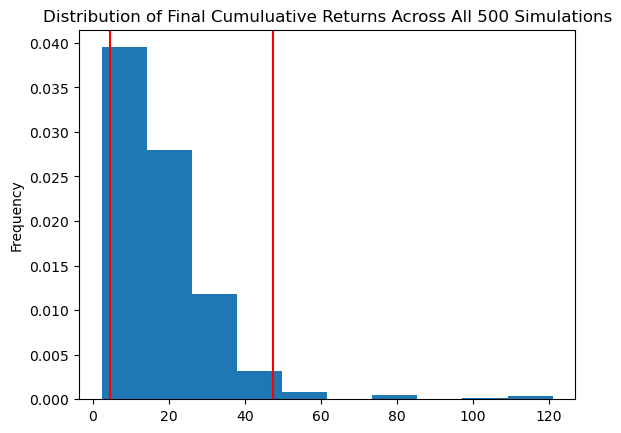

In [22]:
# Plot probability distribution and confidence intervals
d_c_intervals = MC_thirty.plot_distribution()

### Retirement Analysis

In [23]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
sum_stats=MC_thirty.summarize_cumulative_return()

# Print summary statistics
# YOUR CODE HERE!
sum_stats

count           500.000000
mean             18.318701
std              13.292083
min               2.414683
25%               9.731095
50%              15.051943
75%              23.542928
max             120.904681
95% CI Lower      4.697801
95% CI Upper     47.351696
Name: 7560, dtype: float64

### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [26]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
# YOUR CODE HERE!
ci_lower = round(sum_stats[8]*20000,2)
ci_upper = round(sum_stats[9]*20000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $93956.02 and $947033.92


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [27]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
# YOUR CODE HERE!
ci_lower=round(sum_stats[8]*initial_investment,2)
ci_upper=round(sum_stats[9]*initial_investment,2) 
#Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $140934.03 and $1420550.87


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [29]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!
MC_five=MCSimulation(
    portfolio_data=new_df_stock_data,
    weights=[.4,.6],
    num_simulation=500,
    num_trading_days=252 * 5)

In [ ]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!
MC_five.portfolio_data.head()

AGG                                        \
                             open      high       low    close   volume   
timestamp                                                                 
2016-05-02 04:00:00+00:00  110.74  110.7400  110.5200  110.605  3553939   
2016-05-03 04:00:00+00:00  110.89  110.9450  110.7500  110.810  3044940   
2016-05-04 04:00:00+00:00  110.91  110.9315  110.7595  110.860  2920608   
2016-05-05 04:00:00+00:00  110.92  111.1600  110.8010  111.140  3008142   
2016-05-06 04:00:00+00:00  111.12  111.1200  110.9700  110.970  2718710   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2016-05-02 04:00:00+00:00       15119  110.627199          NaN  206.92   
2016-05-03 04:00:00+00:00       15662  110.865995     0.001853  206.52   
2016-05-04 04:00:00+00:00       13982  110.879063     0.000451  204.99   
2016-05-05 04:00:00+00:00       15707  111.028363     0.002526  205.56   
2016-05-06 04:00:00+00:00       12697  111.031967    -0.001530  204.08   

                                                                            \
                             high     low     close     volume trade_count   
timestamp                                                                    
2016-05-02 04:00:00+00:00  208.18  206.41  207.9700   61908515      263580   
2016-05-03 04:00:00+00:00  206.80  205.28  206.1592  106422142      377518   
2016-05-04 04:00:00+00:00  205.85  204.42  205.0100   92199810      345261   
2016-05-05 04:00:00+00:00  205.98  204.47  204.9700   67597222      280622   
2016-05-06 04:00:00+00:00  205.77  203.88  205.7200   89131004      340335   

                                                    
                                 vwap daily_return  
timestamp                                           
2016-05-02 04:00:00+00:00  207.294812          NaN  
2016-05-03 04:00:00+00:00  206.312060    -0.008707  
2016-05-04 04:00:00+00:00  205.090172    -0.005574  
2016-05-05 04:00:00+00:00  205.141555    -0.000195  
2016-05-06 04:00:00+00:00  204.937074     0.003659

In [31]:
# Plot simulation outcomes
# YOUR CODE HERE!
MC_five.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\16238\OneDrive\Desktop\Work Space\ASUBootCamp\05-APIs\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.006433,1.001056,0.992984,0.998917,1.007051,0.997145,0.990287,0.998848,0.999774,1.002443,...,1.009795,0.999356,0.999697,1.000100,1.002419,0.993961,0.993867,1.005039,1.006271,1.015075
2,1.000999,0.997238,0.986780,0.986895,0.995688,0.990714,0.993523,0.985249,0.986261,0.999979,...,1.006216,1.009628,1.008316,0.991844,0.996534,0.983872,0.984631,1.015606,1.010358,1.016864
3,0.992438,1.005076,0.991345,0.976870,0.995463,0.990256,1.001641,0.982836,0.976367,0.995336,...,1.001695,1.007738,1.002777,0.986371,0.984086,0.986994,0.984745,1.016055,1.009390,1.002043
4,0.995482,1.017952,0.985380,0.978710,1.001569,0.992898,1.006982,0.974972,0.980441,0.993686,...,1.000590,1.006160,0.995150,0.984545,0.978780,0.997849,0.983189,1.028410,1.009889,0.995247
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,2.061927,1.682981,1.595286,1.309731,2.288282,1.475792,1.659838,1.330901,1.533238,1.815793,...,1.496807,1.651959,1.677963,1.440403,1.510971,1.713178,1.201341,1.205874,1.363779,1.591548
1257,2.088953,1.668412,1.587316,1.296984,2.292970,1.493143,1.667506,1.331164,1.529148,1.812948,...,1.506676,1.641795,1.678190,1.454797,1.513973,1.718862,1.198564,1.208597,1.351514,1.590052
1258,2.083781,1.658854,1.579099,1.286431,2.288854,1.482954,1.682790,1.320761,1.525498,1.805208,...,1.510463,1.625584,1.686529,1.457140,1.506967,1.720548,1.192668,1.193163,1.363199,1.590126
1259,2.088018,1.650099,1.578363,1.291482,2.300101,1.482997,1.686270,1.323405,1.541308,1.829636,...,1.502788,1.610969,1.662945,1.464546,1.508794,1.744320,1.186388,1.194490,1.358709,1.603599


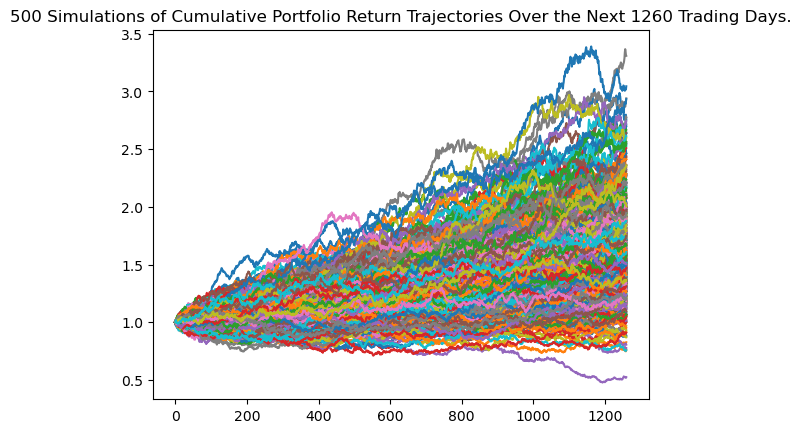

In [32]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
line_outcome = MC_five.plot_simulation()

In [36]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
summ_stats=MC_five.summarize_cumulative_return()

# Print summary statistics
# YOUR CODE HERE!
print(summ_stats)

count           500.000000
mean              1.630398
std               0.409972
min               0.524521
25%               1.354201
50%               1.584045
75%               1.863025
max               3.309299
95% CI Lower      0.959377
95% CI Upper      2.627661
Name: 1260, dtype: float64


In [48]:
# Set initial investment
# YOUR CODE HERE!
init_invest = 2000
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!
ci_lower_five = round(summ_stats[8]*2000,2)
ci_upper_five = round(summ_stats[9]*2000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${init_invest} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $2000 in the portfolio over the next 5 years will end within in the range of $1918.75 and $5255.32


### Ten Years Retirement Option

In [39]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!
MC_ten=MCSimulation(
    portfolio_data=new_df_stock_data,
    weights=[.4,.6],
    num_simulation=500,
    num_trading_days=252 * 10)

In [40]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!
MC_ten.portfolio_data.head()

AGG                                        \
                             open      high       low    close   volume   
timestamp                                                                 
2016-05-02 04:00:00+00:00  110.74  110.7400  110.5200  110.605  3553939   
2016-05-03 04:00:00+00:00  110.89  110.9450  110.7500  110.810  3044940   
2016-05-04 04:00:00+00:00  110.91  110.9315  110.7595  110.860  2920608   
2016-05-05 04:00:00+00:00  110.92  111.1600  110.8010  111.140  3008142   
2016-05-06 04:00:00+00:00  111.12  111.1200  110.9700  110.970  2718710   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2016-05-02 04:00:00+00:00       15119  110.627199          NaN  206.92   
2016-05-03 04:00:00+00:00       15662  110.865995     0.001853  206.52   
2016-05-04 04:00:00+00:00       13982  110.879063     0.000451  204.99   
2016-05-05 04:00:00+00:00       15707  111.028363     0.002526  205.56   
2016-05-06 04:00:00+00:00       12697  111.031967    -0.001530  204.08   

                                                                            \
                             high     low     close     volume trade_count   
timestamp                                                                    
2016-05-02 04:00:00+00:00  208.18  206.41  207.9700   61908515      263580   
2016-05-03 04:00:00+00:00  206.80  205.28  206.1592  106422142      377518   
2016-05-04 04:00:00+00:00  205.85  204.42  205.0100   92199810      345261   
2016-05-05 04:00:00+00:00  205.98  204.47  204.9700   67597222      280622   
2016-05-06 04:00:00+00:00  205.77  203.88  205.7200   89131004      340335   

                                                    
                                 vwap daily_return  
timestamp                                           
2016-05-02 04:00:00+00:00  207.294812          NaN  
2016-05-03 04:00:00+00:00  206.312060    -0.008707  
2016-05-04 04:00:00+00:00  205.090172    -0.005574  
2016-05-05 04:00:00+00:00  205.141555    -0.000195  
2016-05-06 04:00:00+00:00  204.937074     0.003659

In [41]:
# Plot simulation outcomes
# YOUR CODE HERE!
MC_ten.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\16238\OneDrive\Desktop\Work Space\ASUBootCamp\05-APIs\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.989744,1.001530,0.995568,1.007196,1.003796,1.006055,0.996558,1.005396,0.996054,0.992001,...,0.998507,0.997312,0.993924,1.003523,0.987510,0.994830,1.005317,1.000638,0.991459,0.993963
2,0.995974,0.993330,1.009354,1.019848,1.015533,1.005019,0.991357,0.990776,0.996729,0.994984,...,0.999210,1.002633,1.006868,1.013234,0.989532,0.986689,1.003543,1.002686,0.993311,0.986639
3,0.995067,1.001830,1.001267,1.014695,1.013418,0.996087,0.991633,0.992359,0.985111,0.995125,...,0.997575,0.982934,1.004767,1.021132,0.997817,0.985659,1.004253,1.009622,1.008188,0.998794
4,0.987125,0.994874,1.005743,1.006299,1.002424,0.993976,0.984964,0.995327,0.984524,0.995831,...,0.991334,0.978215,1.013513,1.027095,0.990538,0.985757,1.008296,1.011367,1.001135,1.001597
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,2.804317,3.194055,3.502020,2.402024,4.071205,2.455663,2.877425,2.244932,1.601906,3.743456,...,2.694303,3.378490,2.946055,1.701260,1.708363,2.709789,3.526831,3.644772,1.804539,2.097612
2517,2.809070,3.213140,3.500213,2.420641,4.090601,2.480633,2.896525,2.241535,1.588654,3.732146,...,2.712181,3.343356,2.903250,1.706749,1.703813,2.709299,3.548157,3.650974,1.799023,2.097830
2518,2.793727,3.204947,3.545354,2.399044,4.049824,2.480158,2.902435,2.246308,1.615848,3.703786,...,2.717638,3.380723,2.895851,1.705892,1.708546,2.679116,3.549162,3.661621,1.817621,2.074952
2519,2.797263,3.243319,3.536667,2.376052,4.022642,2.450834,2.973574,2.240089,1.616042,3.678781,...,2.747853,3.419557,2.882570,1.726724,1.729034,2.676478,3.533724,3.660441,1.830208,2.086205


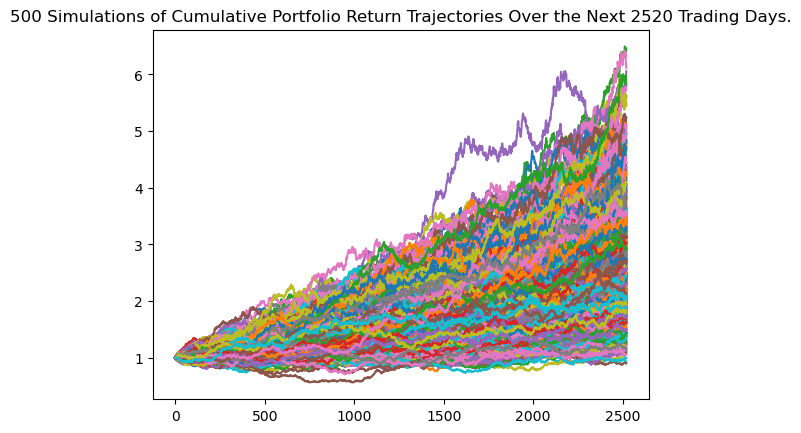

In [42]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
dis_con_int = MC_ten.plot_simulation()

In [49]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
summary_stats=MC_ten.summarize_cumulative_return()
# Print summary statistics
# YOUR CODE HERE!
print(summary_stats)

count           500.000000
mean              2.673000
std               0.995148
min               0.903067
25%               1.951953
50%               2.495502
75%               3.237495
max               6.456417
95% CI Lower      1.195286
95% CI Upper      5.020519
Name: 2520, dtype: float64


In [47]:
# Set initial investment
# YOUR CODE HERE!
initial_invest = 200


# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!
ci_lower_ten = round(summary_stats[8]*200,2)
ci_upper_ten = round(summary_stats[9]*200,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_invest} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $200 in the portfolio over the next 10 years will end within in the range of $191.88 and $525.53
